In [1]:
import gdown
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import jit

from monai.apps.deepgrow.transforms import (
    AddGuidanceFromPointsd,
    AddGuidanceSignald,
    ResizeGuidanced,
    RestoreLabeld,
    SpatialCropGuidanced,
)
from monai.transforms import (
    AsChannelFirstd,
    Spacingd,
    LoadImaged,
    AddChanneld,
    NormalizeIntensityd,
    ToTensord,
    ToNumpyd,
    Activationsd,
    AsDiscreted,
    Resized
)

max_epochs = 1


def draw_points(guidance, slice_idx):
    if guidance is None:
        return
    colors = ['r+', 'b+']
    for color, points in zip(colors, guidance):
        for p in points:
            if p[0] != slice_idx:
                continue
            p1 = p[-1]
            p2 = p[-2]
            plt.plot(p1, p2, color, 'MarkerSize', 30)


def show_image(image, label, guidance=None, slice_idx=None):
    plt.figure("check", (12, 6))
    plt.subplot(1, 2, 1)
    plt.title("image")
    plt.imshow(image, cmap="gray")

    if label is not None:
        masked = np.ma.masked_where(label == 0, label)
        plt.imshow(masked, 'jet', interpolation='none', alpha=0.7)

    draw_points(guidance, slice_idx)
    plt.colorbar()

    if label is not None:
        plt.subplot(1, 2, 2)
        plt.title("label")
        plt.imshow(label)
        plt.colorbar()
        # draw_points(guidance, slice_idx)
    plt.show()


def print_data(data):
    for k in data:
        v = data[k]

        d = type(v)
        if type(v) in (int, float, bool, str, dict, tuple):
            d = v
        elif hasattr(v, 'shape'):
            d = v.shape

        if k in ('image_meta_dict', 'label_meta_dict'):
            for m in data[k]:
                print('{} Meta:: {} => {}'.format(k, m, data[k][m]))
        else:
            print('Data key: {} = {}'.format(k, d))

In [2]:
# Download data and model

resource = "https://drive.google.com/uc?id=1cIlDXWx4pEFpldoIXMEe-5JeaOxzB05Z"
dst = "_image.nii.gz"

if not os.path.exists(dst):
    gdown.download(resource, dst, quiet=False)

resource = "https://drive.google.com/uc?id=1BcU4Z-wdkw7xjydDNd28iVBUVDJYKqCO"
dst = "deepgrow_3d.ts"
if not os.path.exists(dst):
    gdown.download(resource, dst, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1cIlDXWx4pEFpldoIXMEe-5JeaOxzB05Z
To: /home/yuantingh/project_monai/Tutorials/deepgrow/ignite/_image.nii.gz
30.9MB [00:00, 81.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BcU4Z-wdkw7xjydDNd28iVBUVDJYKqCO
To: /home/yuantingh/project_monai/Tutorials/deepgrow/ignite/deepgrow_3d.ts
90.6MB [00:01, 73.1MB/s]


LoadImaged => image shape: (392, 392, 210)
Guidance: [[[145, 66, 180], [105, 66, 180]], []]; Slice Idx: 145


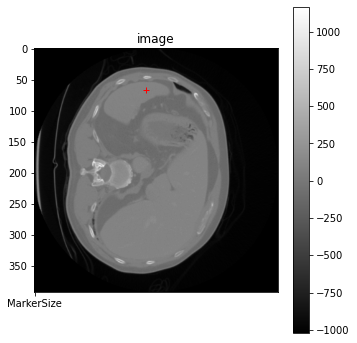

AsChannelFirstd => image shape: (210, 392, 392)
Guidance: [[[145, 66, 180], [105, 66, 180]], []]; Slice Idx: 145


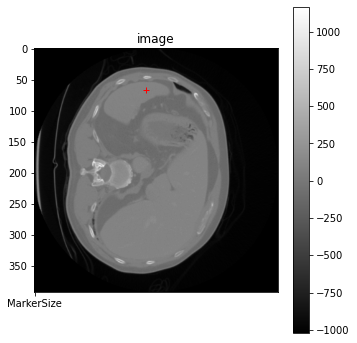

Spacingd => image shape: (210, 392, 392)
Guidance: [[[145, 66, 180], [105, 66, 180]], []]; Slice Idx: 145


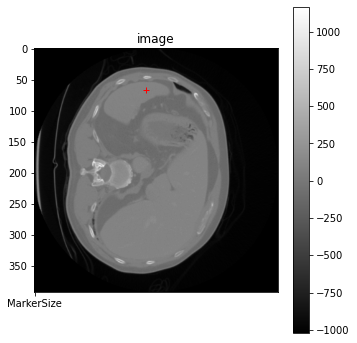

AddGuidanceFromPointsd => image shape: (210, 392, 392)
Guidance: [[[105, 66, 180], [145, 66, 180]], []]; Slice Idx: 105


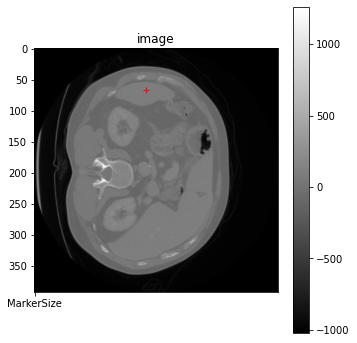

AddChanneld => image shape: (1, 210, 392, 392)
Guidance: [[[105, 66, 180], [145, 66, 180]], []]; Slice Idx: 105


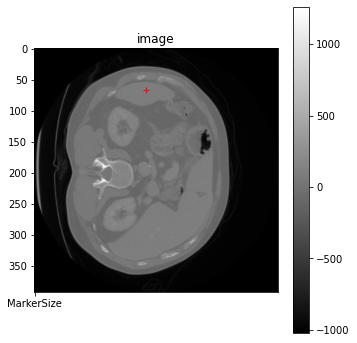

SpatialCropGuidanced => image shape: (1, 210, 256, 256)
Guidance: [[[105, 66, 128], [145, 66, 128]], []]; Slice Idx: 105


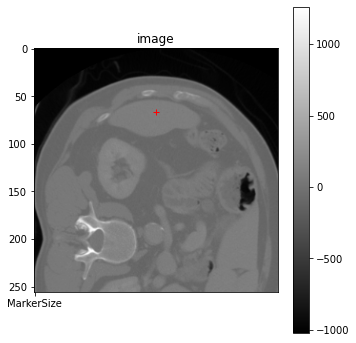

Resized => image shape: (1, 128, 192, 192)
Guidance: [[[105, 66, 128], [145, 66, 128]], []]; Slice Idx: 105
ResizeGuidanced => image shape: (1, 128, 192, 192)
Guidance: [[[64, 49, 96], [88, 49, 96]], []]; Slice Idx: 64


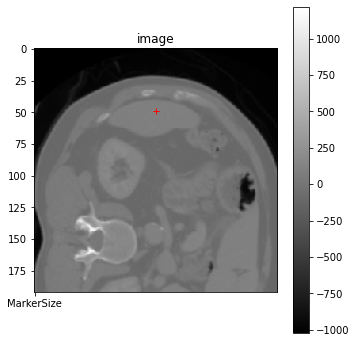

NormalizeIntensityd => image shape: (1, 128, 192, 192)
Guidance: [[[64, 49, 96], [88, 49, 96]], []]; Slice Idx: 64


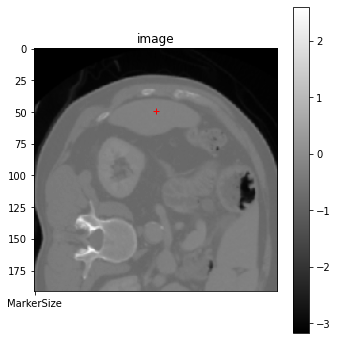

AddGuidanceSignald => image shape: (3, 128, 192, 192)
Guidance: [[[64, 49, 96], [88, 49, 96]], []]; Slice Idx: 64


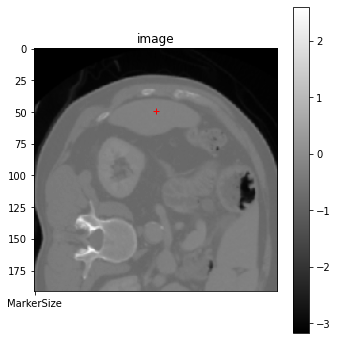

ToTensord => image shape: torch.Size([3, 128, 192, 192])
Guidance: [[[64, 49, 96], [88, 49, 96]], []]; Slice Idx: 64


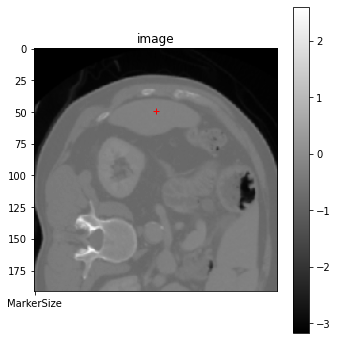

Slice Idx: 0
Slice Idx: 1
Slice Idx: 2
Slice Idx: 3
Slice Idx: 4
Slice Idx: 5
Slice Idx: 6
Slice Idx: 7
Slice Idx: 8
Slice Idx: 9
Slice Idx: 10
Slice Idx: 11
Slice Idx: 12
Slice Idx: 13
Slice Idx: 14
Slice Idx: 15
Slice Idx: 16
Slice Idx: 17
Slice Idx: 18
Slice Idx: 19
Slice Idx: 20
Slice Idx: 21
Slice Idx: 22
Slice Idx: 23
Slice Idx: 24
Slice Idx: 25
Slice Idx: 26
Slice Idx: 27
Slice Idx: 28
Slice Idx: 29
Slice Idx: 30
Slice Idx: 31
Slice Idx: 32
Slice Idx: 33
Slice Idx: 34
Slice Idx: 35
Slice Idx: 36
Slice Idx: 37
Slice Idx: 38
Slice Idx: 39
Slice Idx: 40
Slice Idx: 41
Slice Idx: 42
Slice Idx: 43
Slice Idx: 44
Slice Idx: 45
Slice Idx: 46
Slice Idx: 47
Slice Idx: 48
Slice Idx: 49
Slice Idx: 50
Slice Idx: 51
Slice Idx: 52
Slice Idx: 53
Slice Idx: 54
Slice Idx: 55
Slice Idx: 56
Slice Idx: 57
Slice Idx: 58
Slice Idx: 59
Slice Idx: 60
Slice Idx: 61
Slice Idx: 62
Slice Idx: 63
Slice Idx: 64
Slice Idx: 65
Slice Idx: 66
Slice Idx: 67
Slice Idx: 68
Slice Idx: 69
Slice Idx: 70
Slice Idx: 71
Sl

In [3]:
# Pre Processing
roi_size = [256, 256]
model_size = [128, 192, 192]
pixdim = (1.0, 1.0, 1.0)
dimensions = 3

data = {
    'image': '_image.nii.gz',
    'foreground': [[66, 180, 105], [66, 180, 145]],
    'background': [],
}
slice_idx = original_slice_idx = data['foreground'][0][2]

pre_transforms = [
    LoadImaged(keys='image'),
    AsChannelFirstd(keys='image'),
    Spacingd(keys='image', pixdim=pixdim, mode='bilinear'),
    AddGuidanceFromPointsd(ref_image='image', guidance='guidance', foreground='foreground', background='background',
                           dimensions=dimensions),
    AddChanneld(keys='image'),
    SpatialCropGuidanced(keys='image', guidance='guidance', spatial_size=roi_size),
    Resized(keys='image', spatial_size=model_size, mode='area'),
    ResizeGuidanced(guidance='guidance', ref_image='image'),
    NormalizeIntensityd(keys='image', subtrahend=208.0, divisor=388.0),
    AddGuidanceSignald(image='image', guidance='guidance'),
    ToTensord(keys='image')
]

original_image = None
for t in pre_transforms:
    tname = type(t).__name__
    data = t(data)
    image = data['image']
    label = data.get('label')
    guidance = data.get('guidance')

    print("{} => image shape: {}".format(tname, image.shape))

    guidance = guidance if guidance else [np.roll(data['foreground'], 1).tolist(), []]
    slice_idx = guidance[0][0][0] if guidance else slice_idx
    print('Guidance: {}; Slice Idx: {}'.format(guidance, slice_idx))
    if tname == 'Resized':
        continue

    image = image[:, :, slice_idx] if tname in ('LoadImaged') else image[slice_idx] if tname in (
        'AsChannelFirstd', 'Spacingd', 'AddGuidanceFromPointsd') else image[0][slice_idx]
    label = None

    show_image(image, label, guidance, slice_idx)
    if tname == 'LoadImaged':
        original_image = data['image']
    if tname == 'AddChanneld':
        original_image_slice = data['image']
    if tname == 'SpatialCropGuidanced':
        spatial_image = data['image']

image = data['image']
label = data.get('label')
guidance = data.get('guidance')
for i in range(image.shape[1]):
    print('Slice Idx: {}'.format(i))
    # show_image(image[0][i], None, guidance, i)

Activationsd => image shape: torch.Size([3, 128, 192, 192]), pred shape: torch.Size([1, 128, 192, 192]); slice_idx: 64
PLOT:: Activationsd => image shape: (192, 192), pred shape: (192, 192); min: 2.537421096349135e-05, max: 1.0, sum: 1489.46240234375


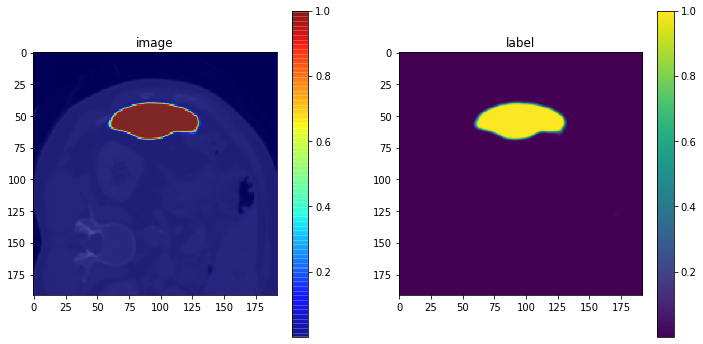

AsDiscreted => image shape: torch.Size([3, 128, 192, 192]), pred shape: torch.Size([1, 128, 192, 192]); slice_idx: 64
PLOT:: AsDiscreted => image shape: (192, 192), pred shape: (192, 192); min: 0.0, max: 1.0, sum: 1453.0


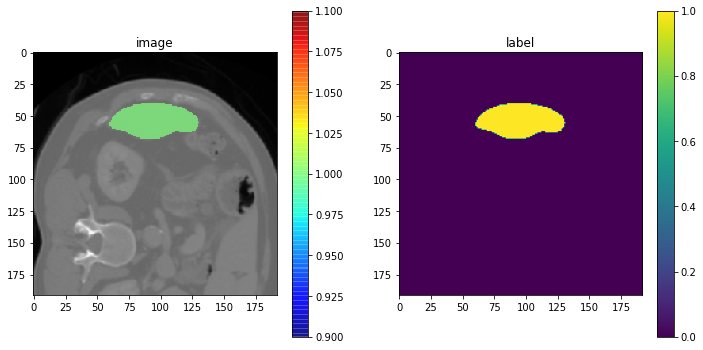

ToNumpyd => image shape: torch.Size([3, 128, 192, 192]), pred shape: (1, 128, 192, 192); slice_idx: 64
PLOT:: ToNumpyd => image shape: (192, 192), pred shape: (192, 192); min: 0.0, max: 1.0, sum: 1453.0


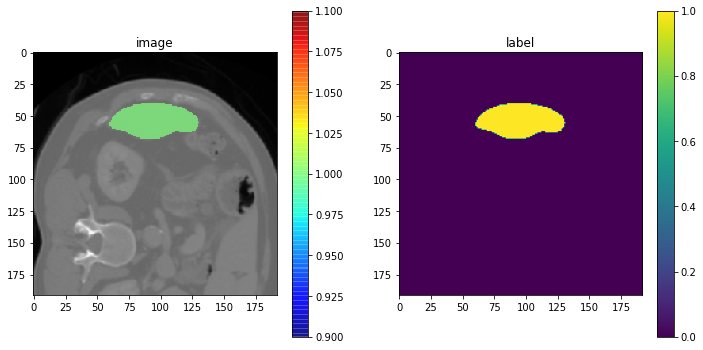

RestoreLabeld => image shape: torch.Size([3, 128, 192, 192]), pred shape: (210, 392, 392); slice_idx: 64
PLOT:: RestoreLabeld => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2585.0


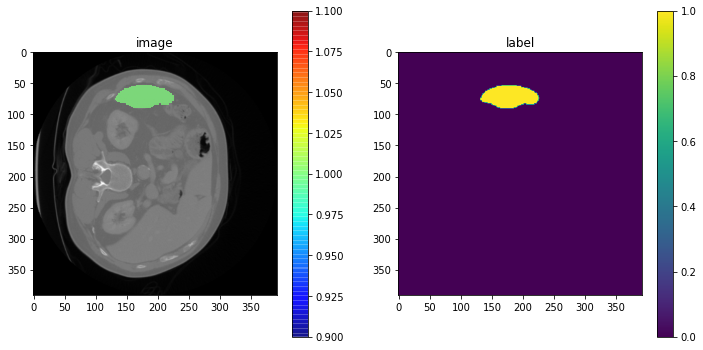

Final PLOT:: 83 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 257.0


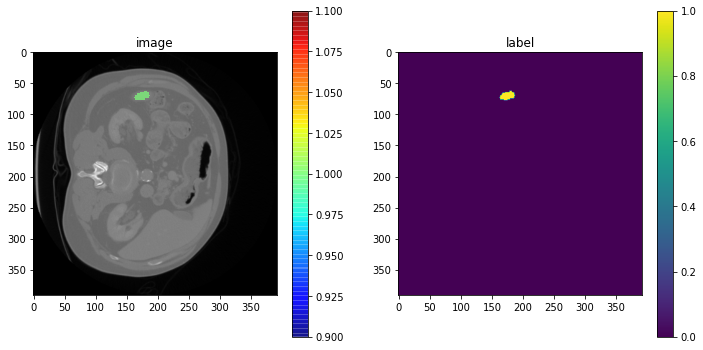

Final PLOT:: 84 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 424.0


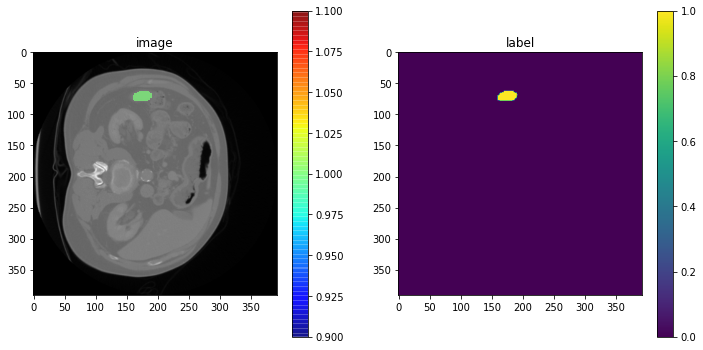

Final PLOT:: 85 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 424.0


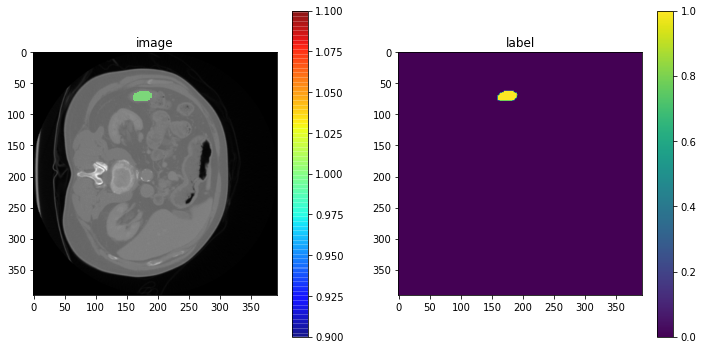

Final PLOT:: 86 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 705.0


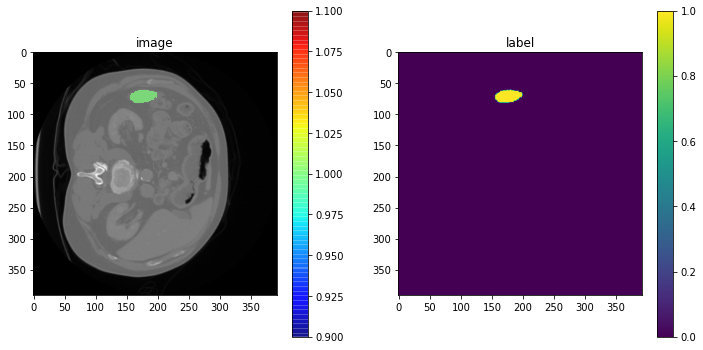

Final PLOT:: 87 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 862.0


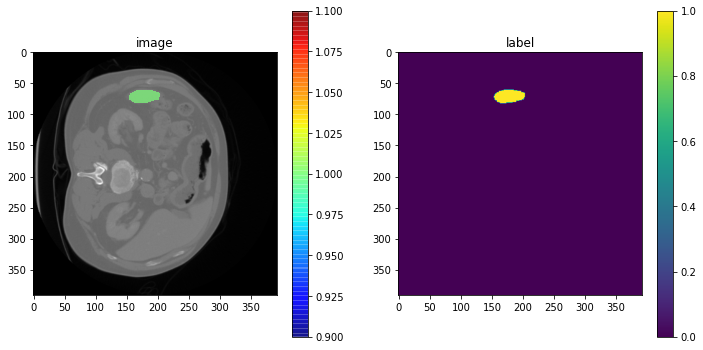

Final PLOT:: 88 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 862.0


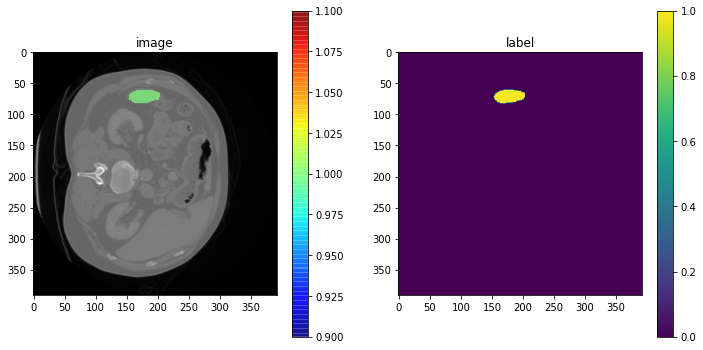

Final PLOT:: 89 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 1120.0


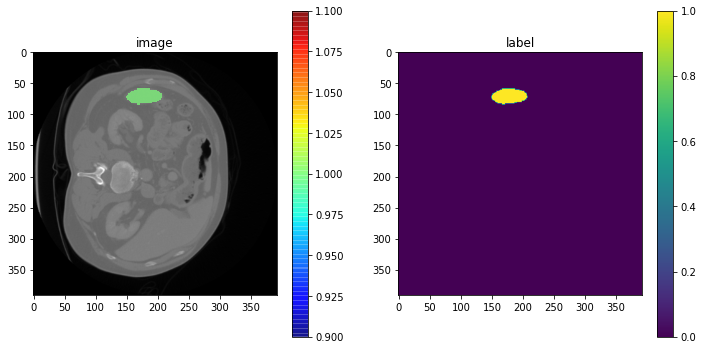

Final PLOT:: 90 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 1120.0


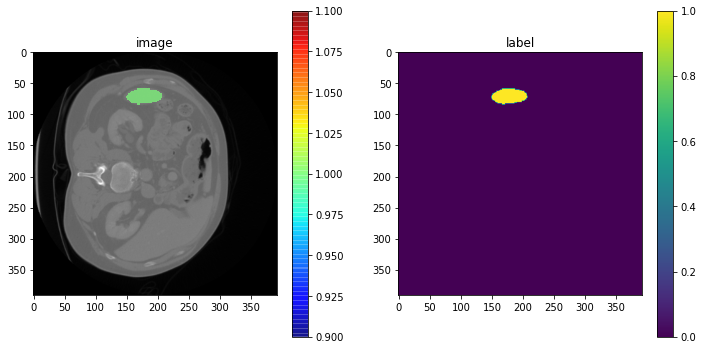

Final PLOT:: 91 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 1303.0


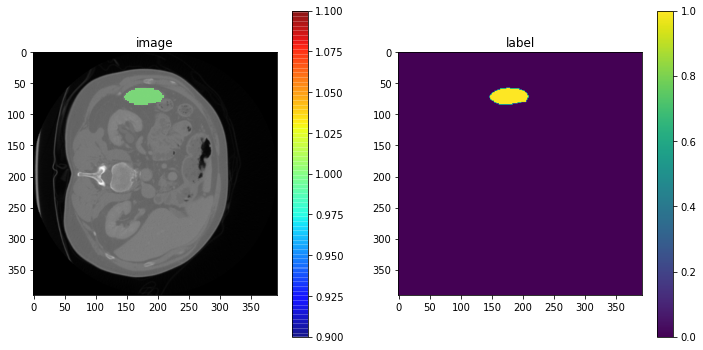

Final PLOT:: 92 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 1437.0


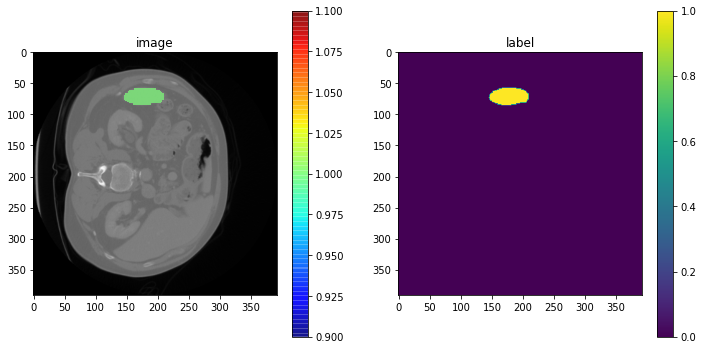

Final PLOT:: 93 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 1437.0


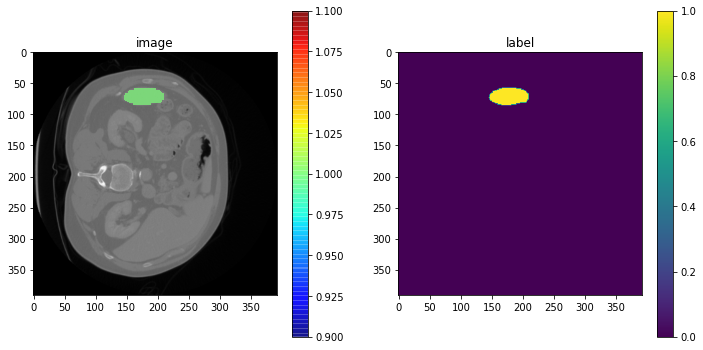

Final PLOT:: 94 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 1631.0


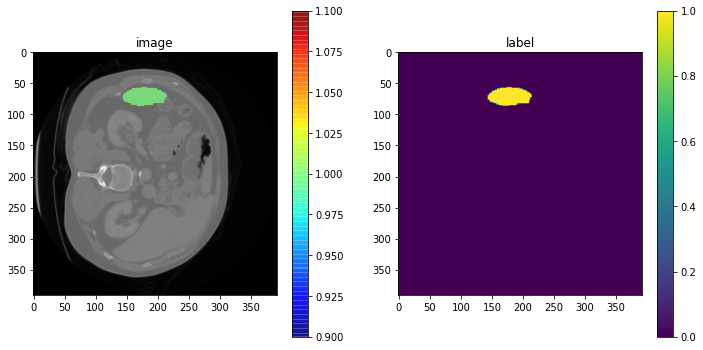

Final PLOT:: 95 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 1631.0


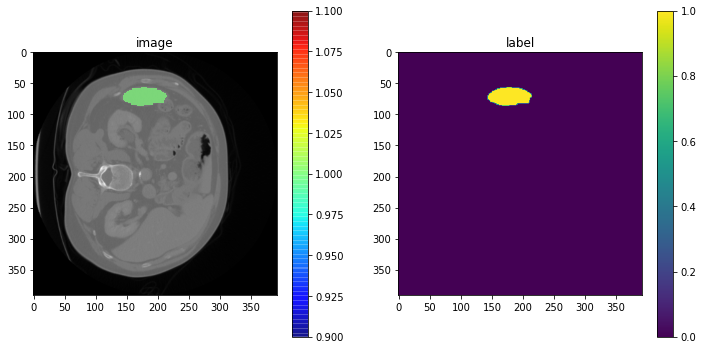

Final PLOT:: 96 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 1807.0


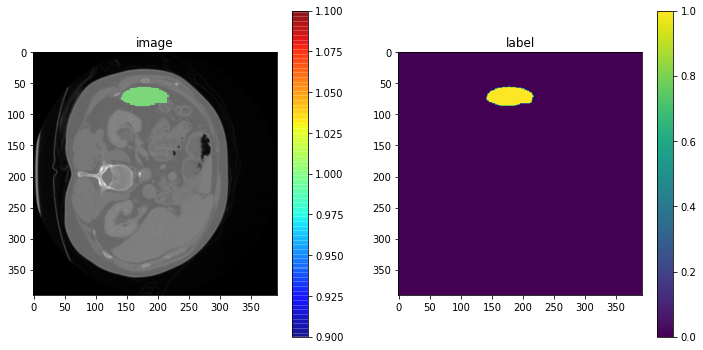

Final PLOT:: 97 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 1987.0


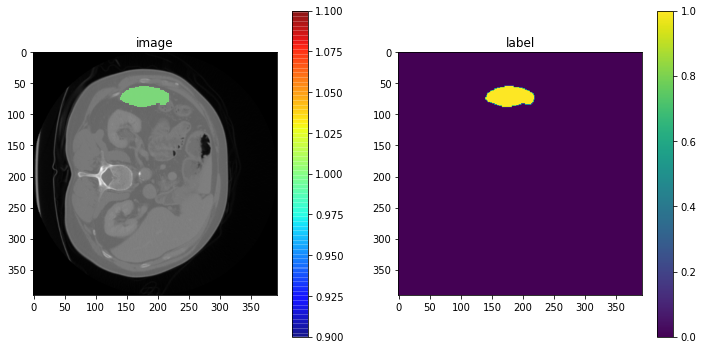

Final PLOT:: 98 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 1987.0


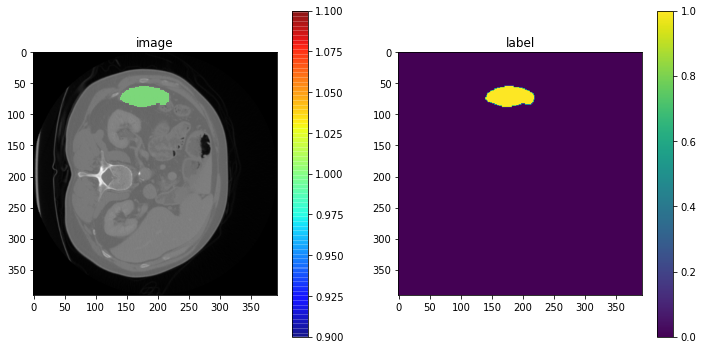

Final PLOT:: 99 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2147.0


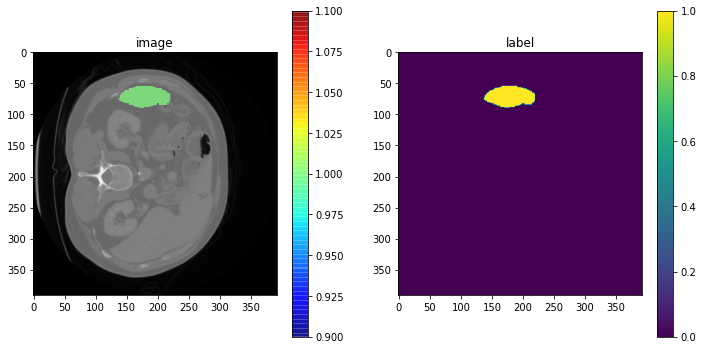

Final PLOT:: 100 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2147.0


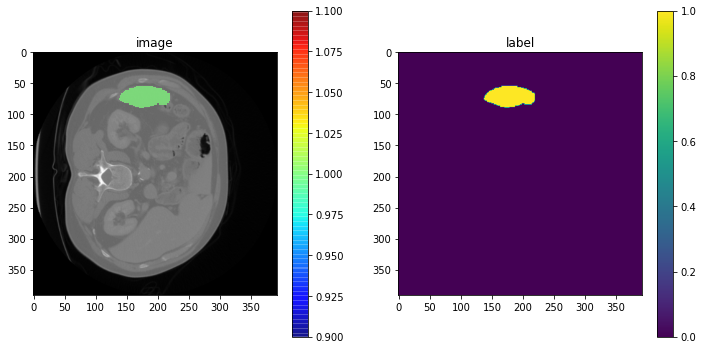

Final PLOT:: 101 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2260.0


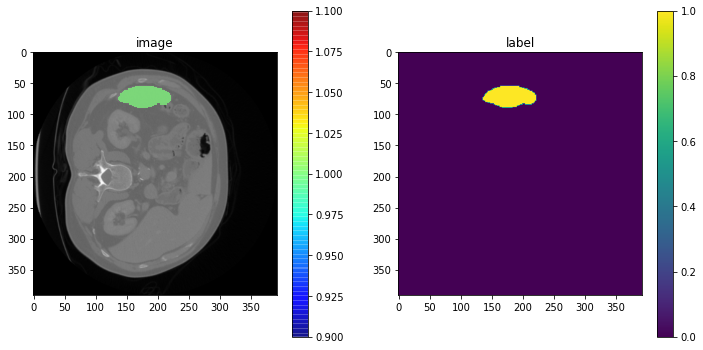

Final PLOT:: 102 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2363.0


Final PLOT:: 103 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2363.0


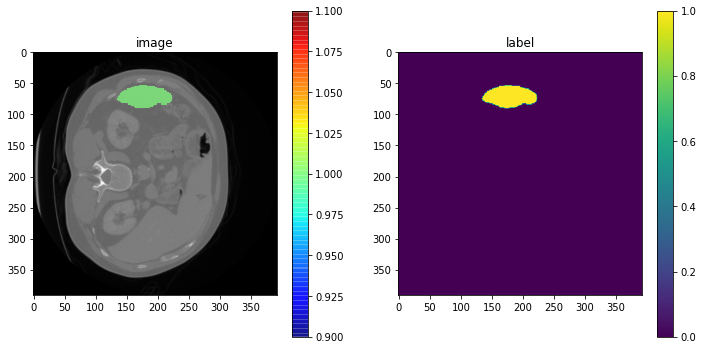

Final PLOT:: 104 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2468.0


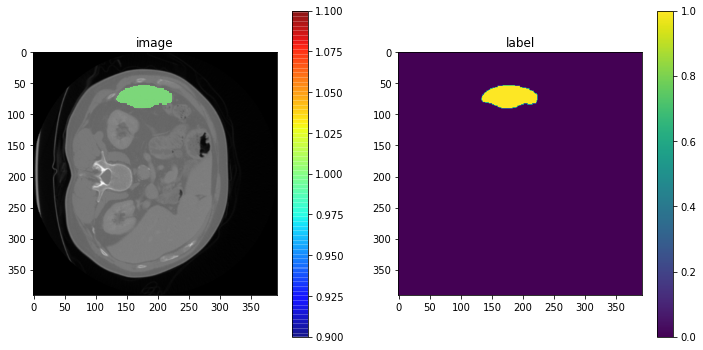

Final PLOT:: 105 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2585.0


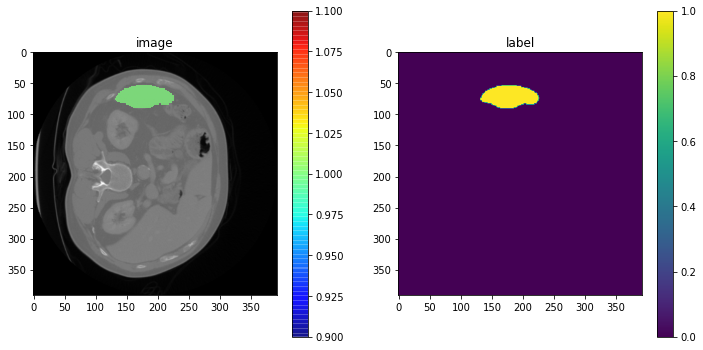

Final PLOT:: 106 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2585.0


Final PLOT:: 107 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2698.0


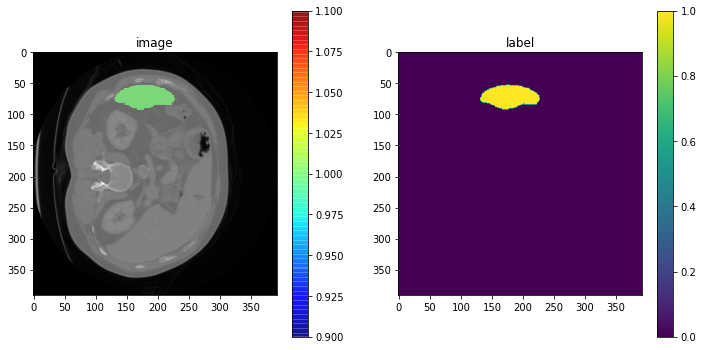

Final PLOT:: 108 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2698.0


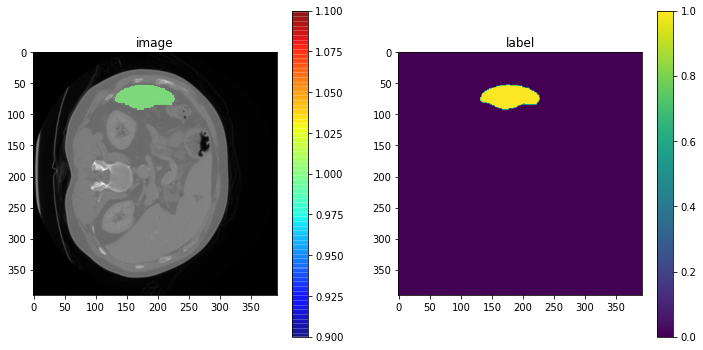

Final PLOT:: 109 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2792.0


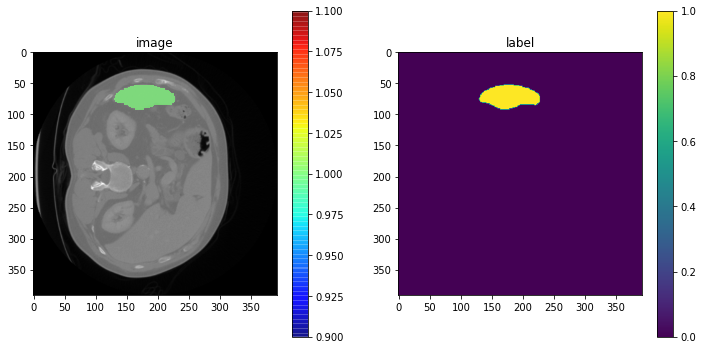

Final PLOT:: 110 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2867.0


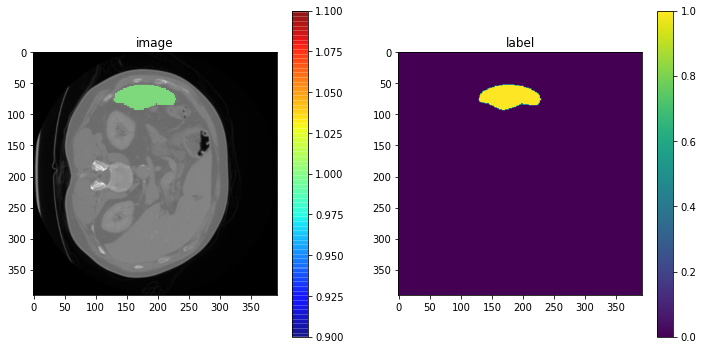

Final PLOT:: 111 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2867.0


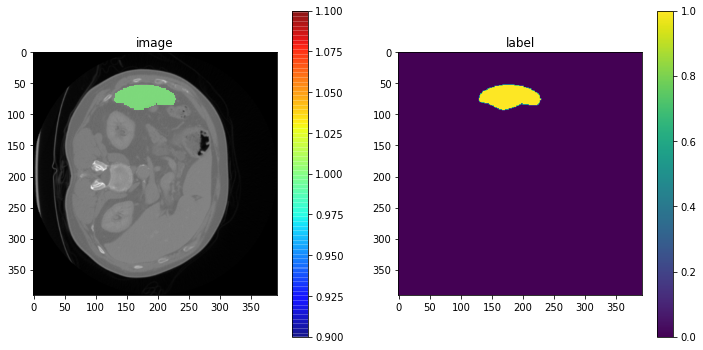

Final PLOT:: 112 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2948.0


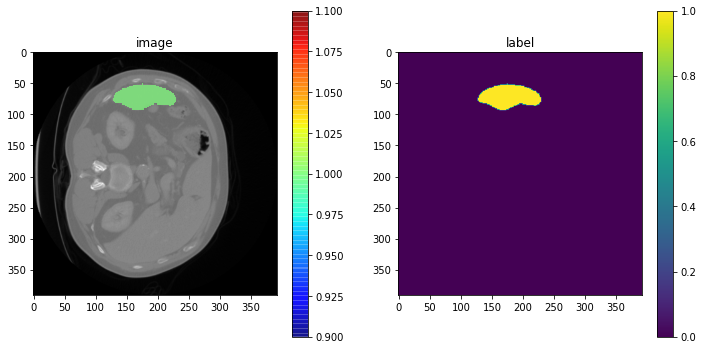

Final PLOT:: 113 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2948.0


Final PLOT:: 114 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3022.0


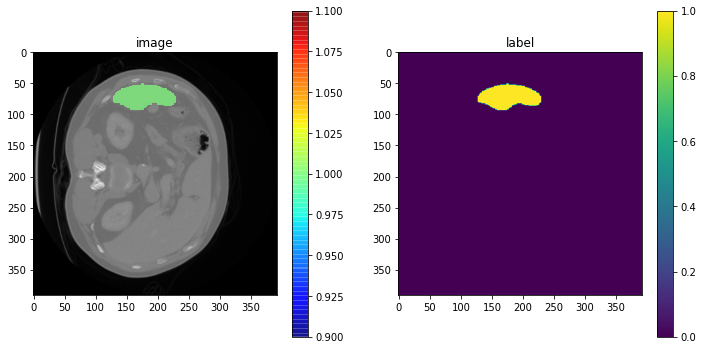

Final PLOT:: 115 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3059.0


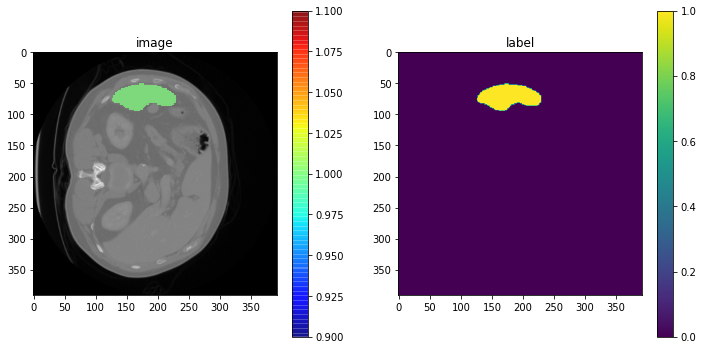

Final PLOT:: 116 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3059.0


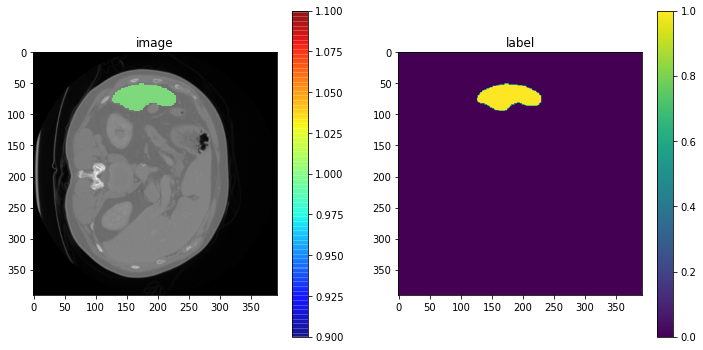

Final PLOT:: 117 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3126.0


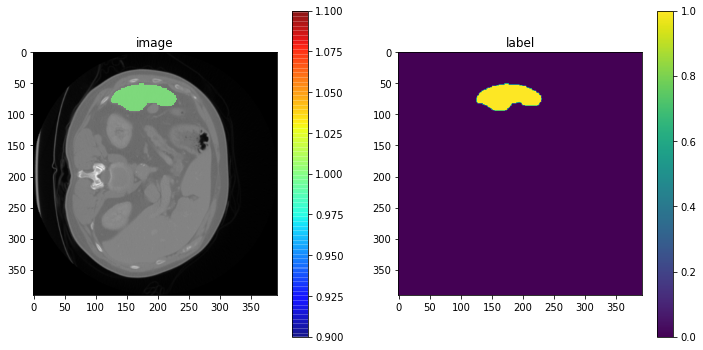

Final PLOT:: 118 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3126.0


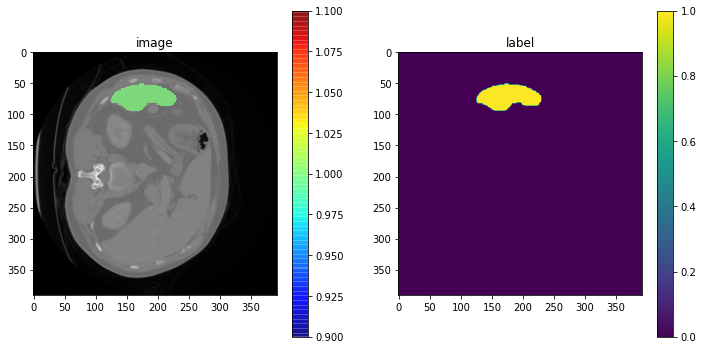

Final PLOT:: 119 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3301.0


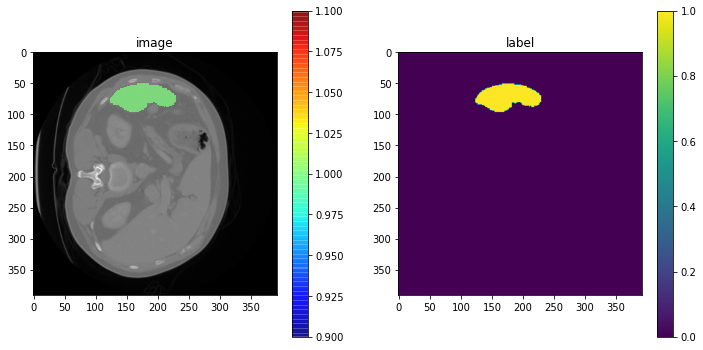

Final PLOT:: 120 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3354.0


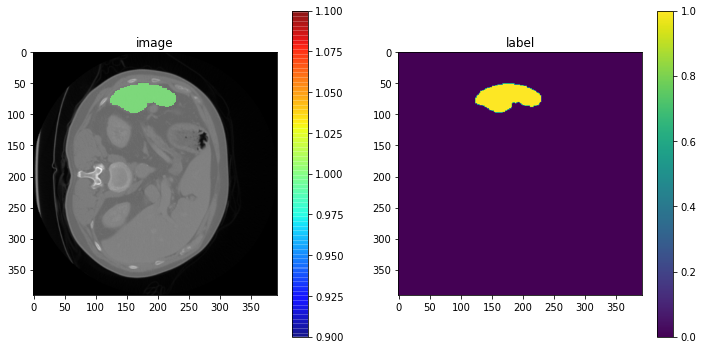

Final PLOT:: 121 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3354.0


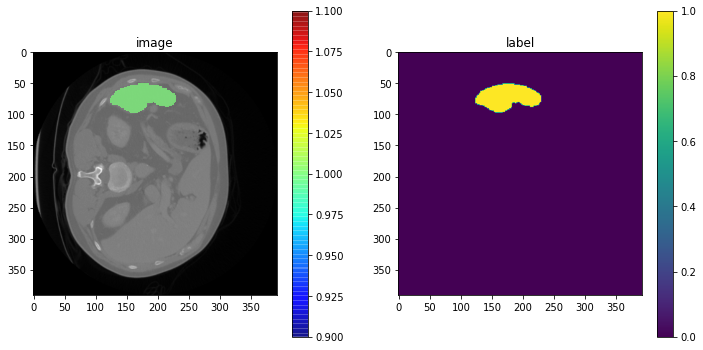

Final PLOT:: 122 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3442.0


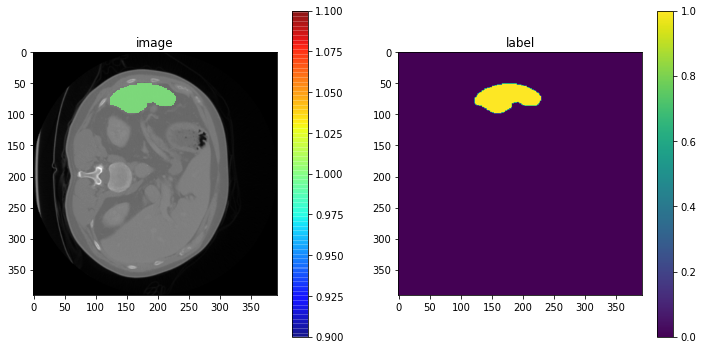

Final PLOT:: 123 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3442.0


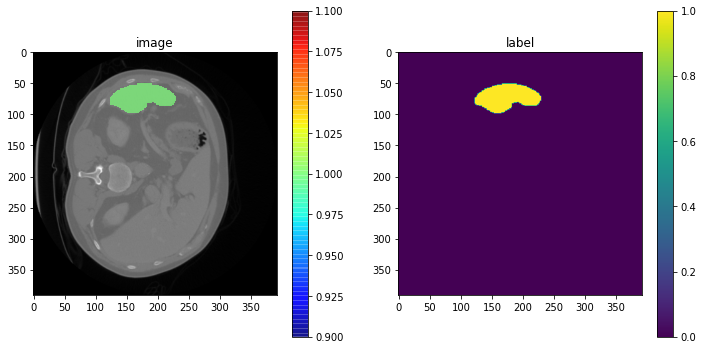

Final PLOT:: 124 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3494.0


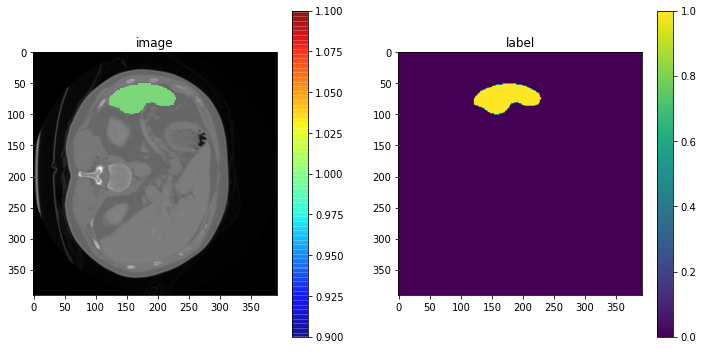

Final PLOT:: 125 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3551.0


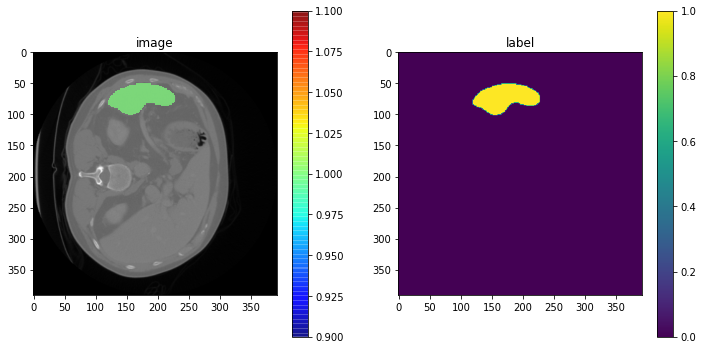

Final PLOT:: 126 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3551.0


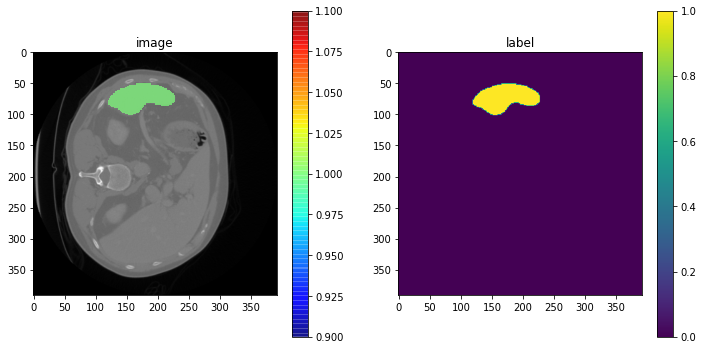

Final PLOT:: 127 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3583.0


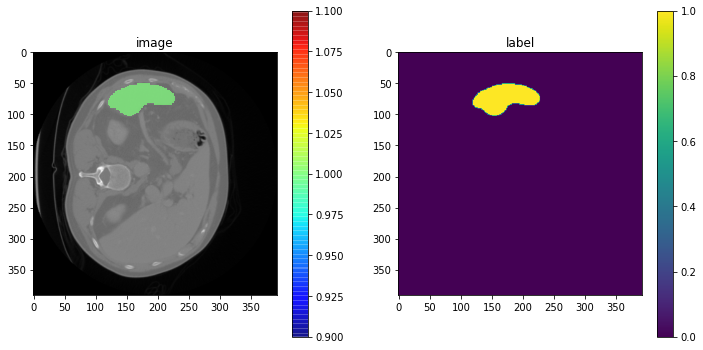

Final PLOT:: 128 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3645.0


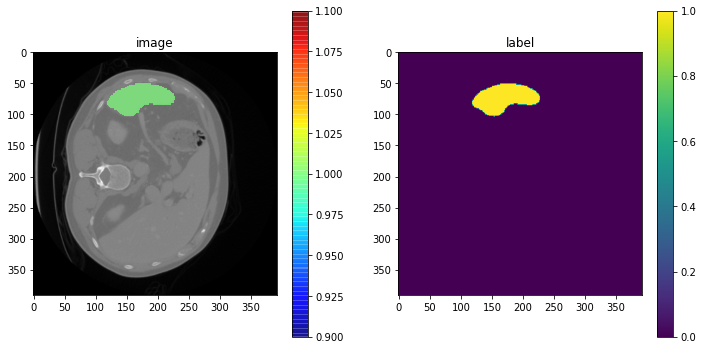

Final PLOT:: 129 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3645.0


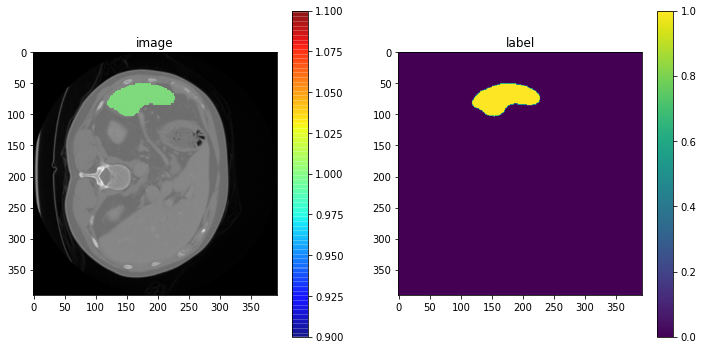

Final PLOT:: 130 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3716.0


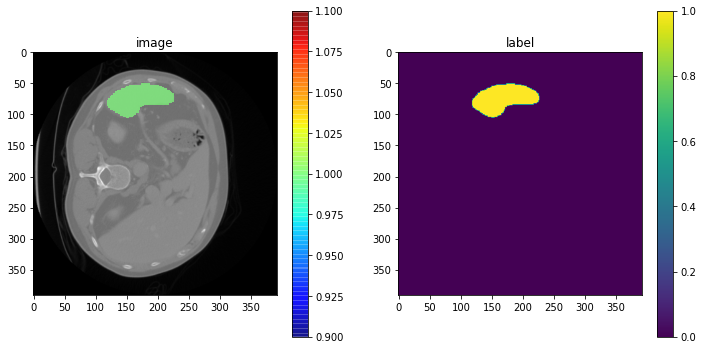

Final PLOT:: 131 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3716.0


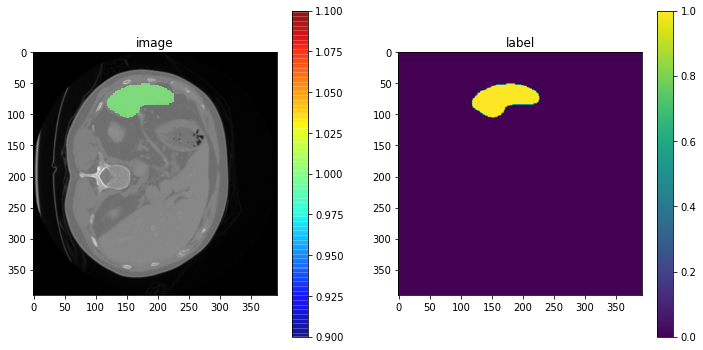

Final PLOT:: 132 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3765.0


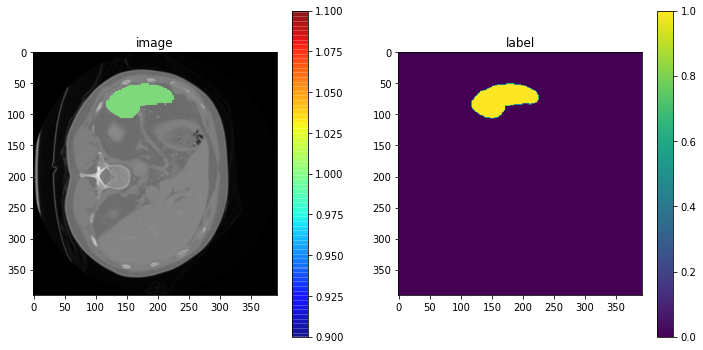

Final PLOT:: 133 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3799.0


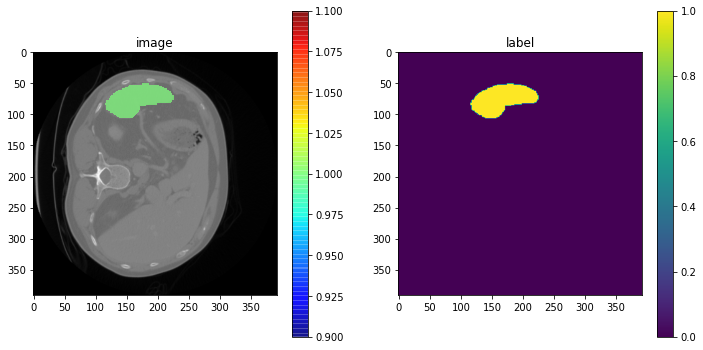

Final PLOT:: 134 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3799.0


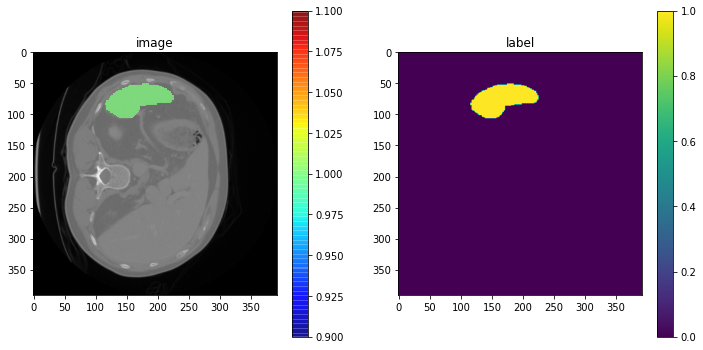

Final PLOT:: 135 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3843.0


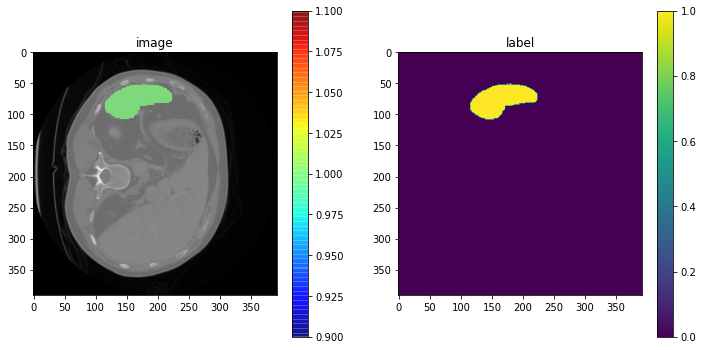

Final PLOT:: 136 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3843.0


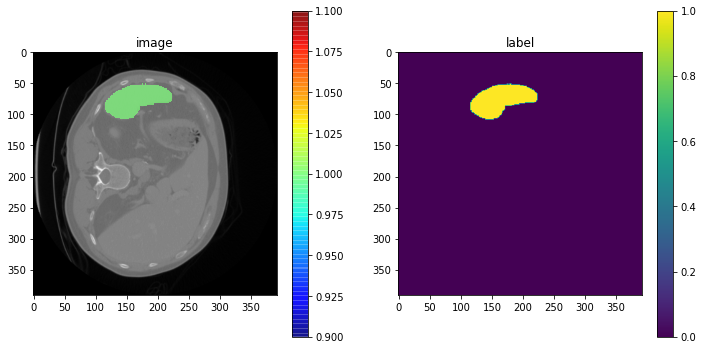

Final PLOT:: 137 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3863.0


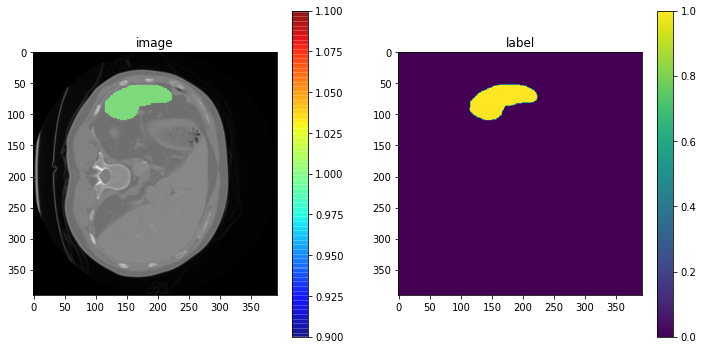

Final PLOT:: 138 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3892.0


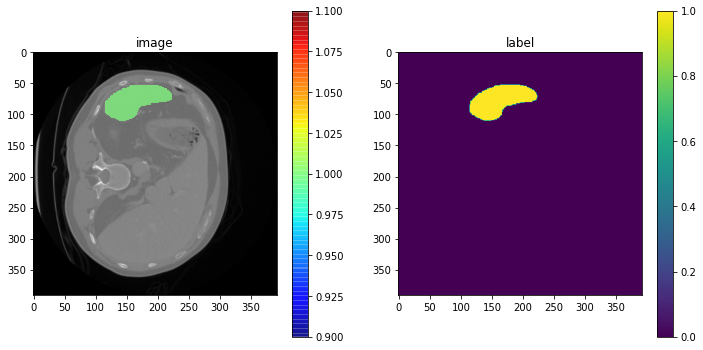

Final PLOT:: 139 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3892.0


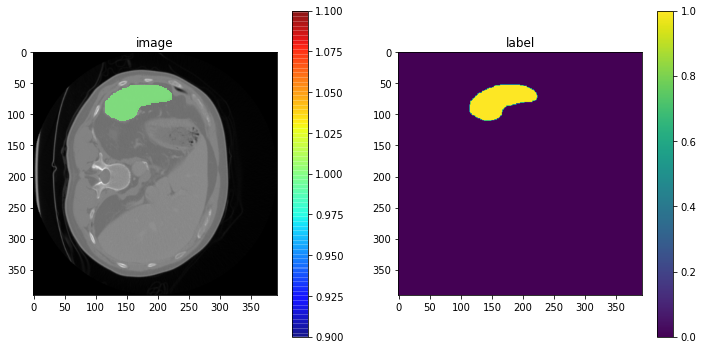

Final PLOT:: 140 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3915.0


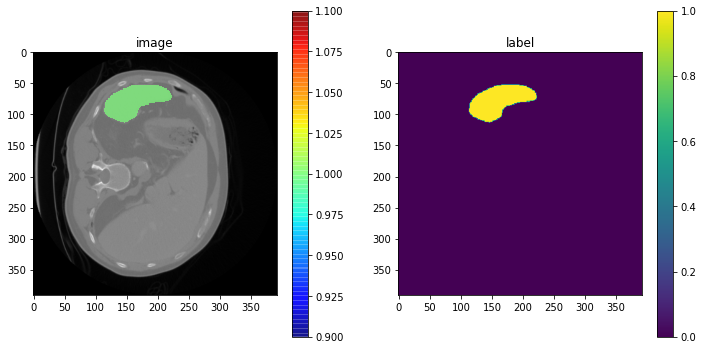

Final PLOT:: 141 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3915.0


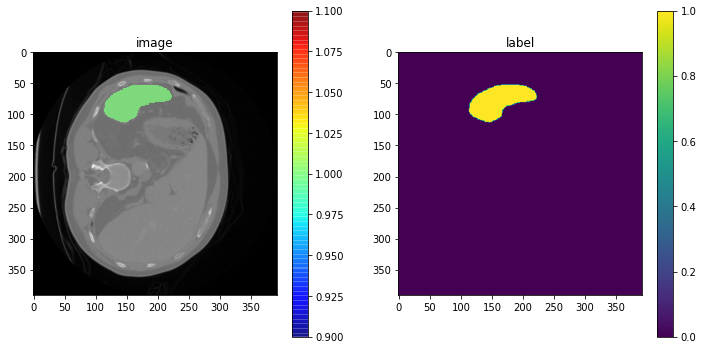

Final PLOT:: 142 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3918.0


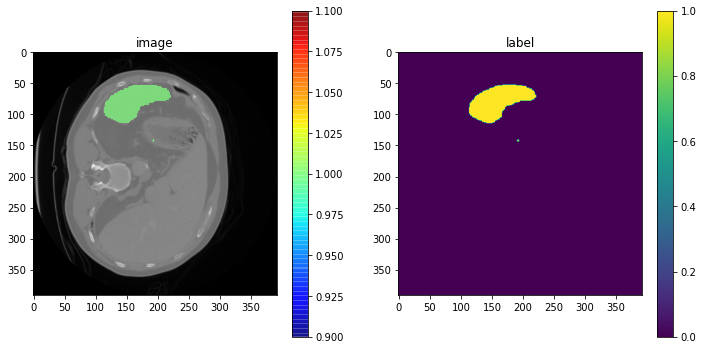

Final PLOT:: 143 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3911.0


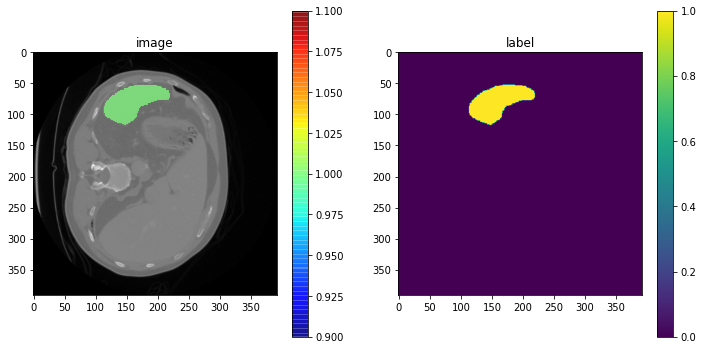

Final PLOT:: 144 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3911.0


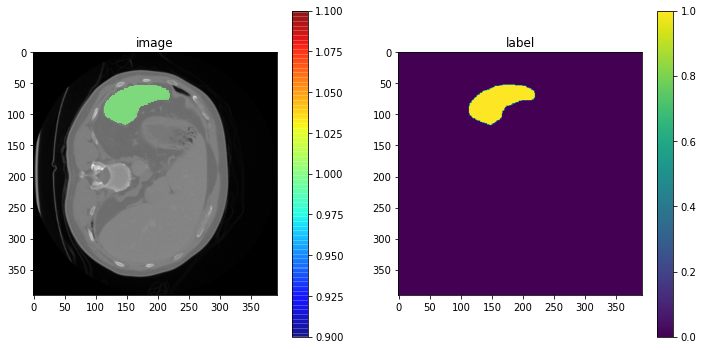

Final PLOT:: 145 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3908.0


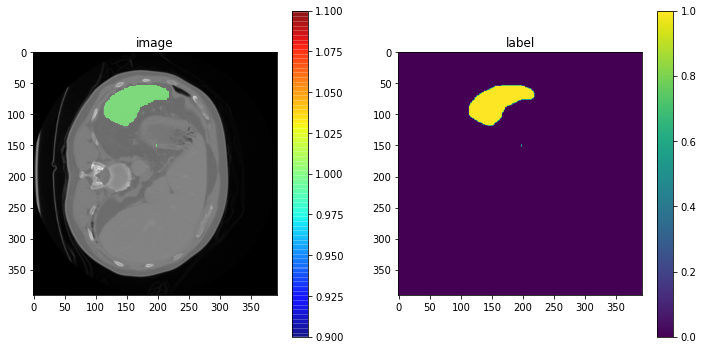

Final PLOT:: 146 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3908.0


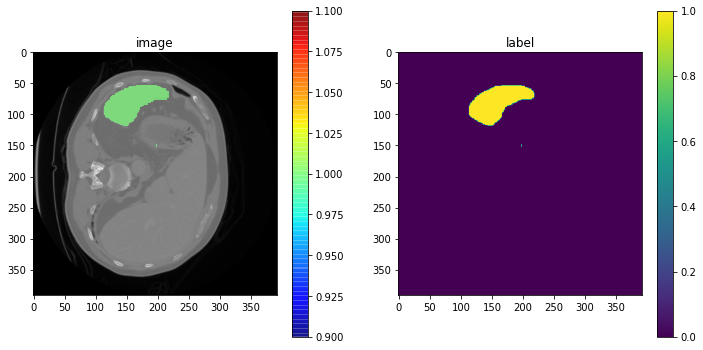

Final PLOT:: 147 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3902.0


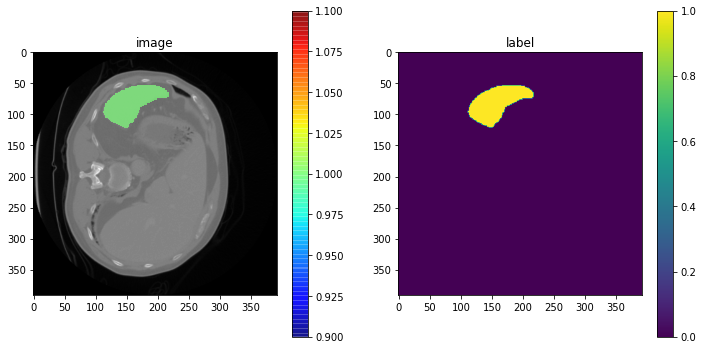

Final PLOT:: 148 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3893.0


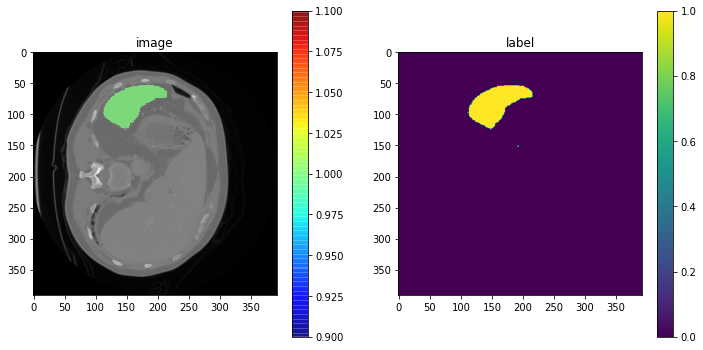

Final PLOT:: 149 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3893.0


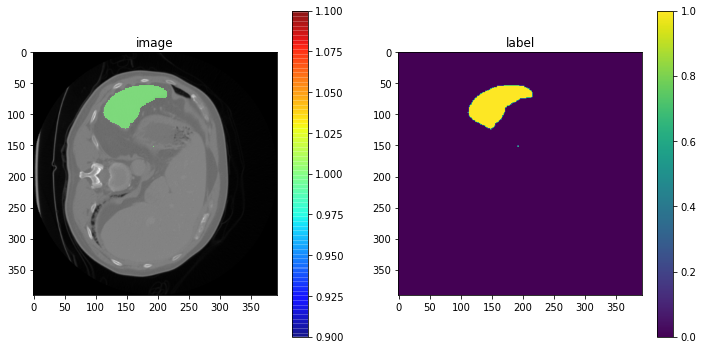

Final PLOT:: 150 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3862.0


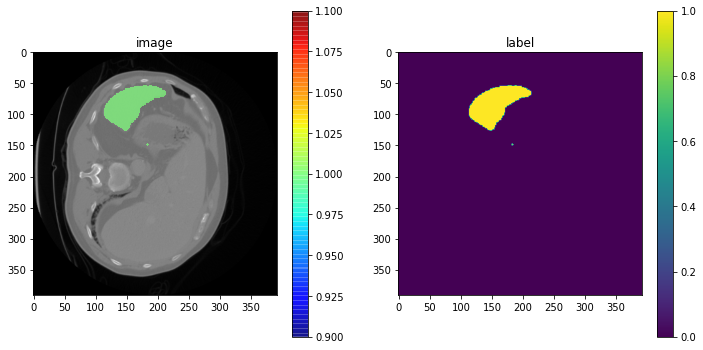

Final PLOT:: 151 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3796.0


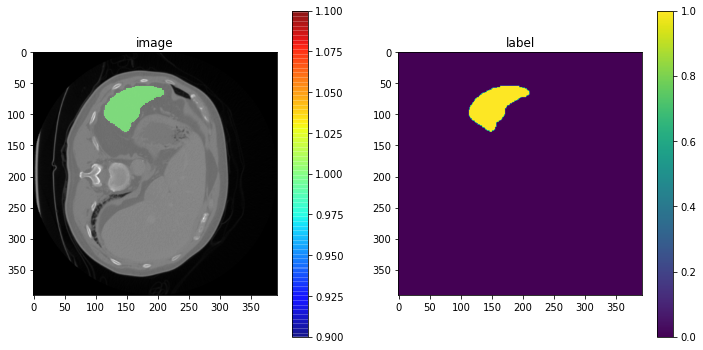

Final PLOT:: 152 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3796.0


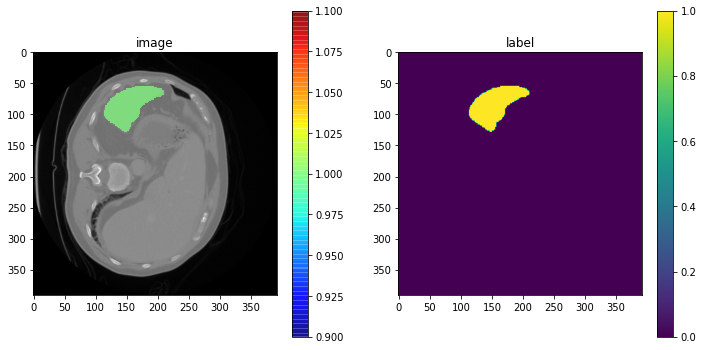

Final PLOT:: 153 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3732.0


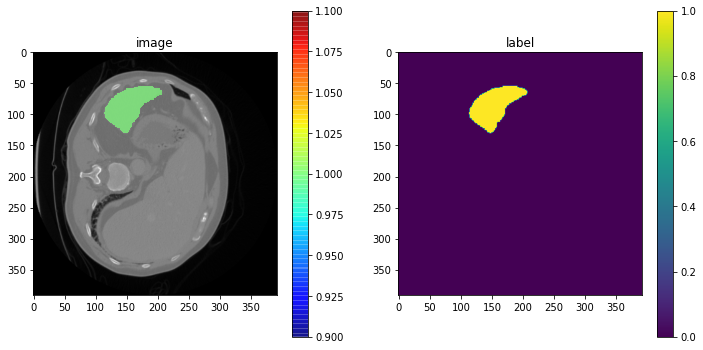

Final PLOT:: 154 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3732.0


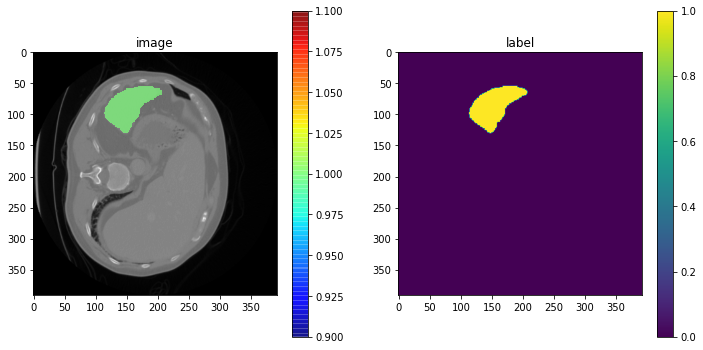

Final PLOT:: 155 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3670.0


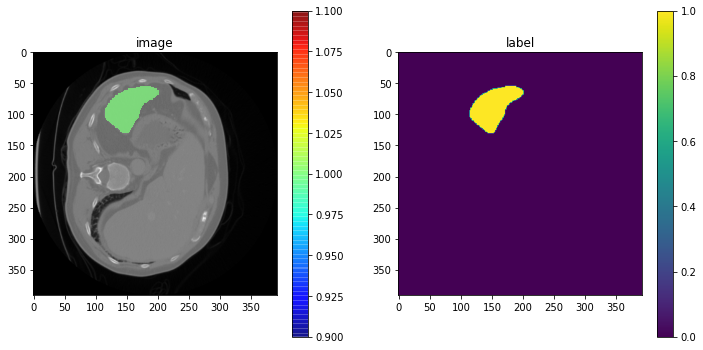

Final PLOT:: 156 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3615.0


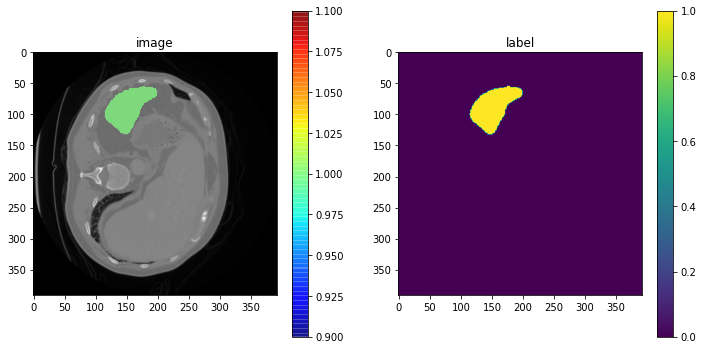

Final PLOT:: 157 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3615.0


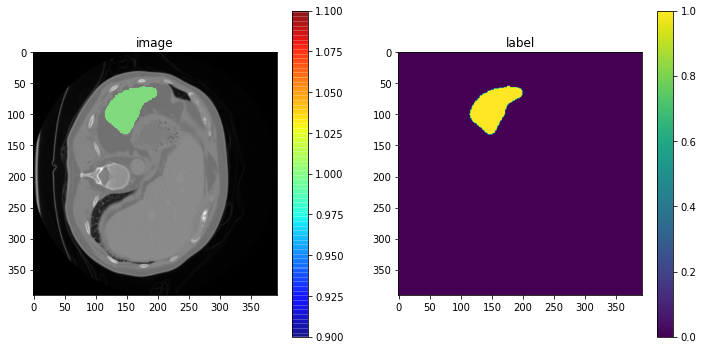

Final PLOT:: 158 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3583.0


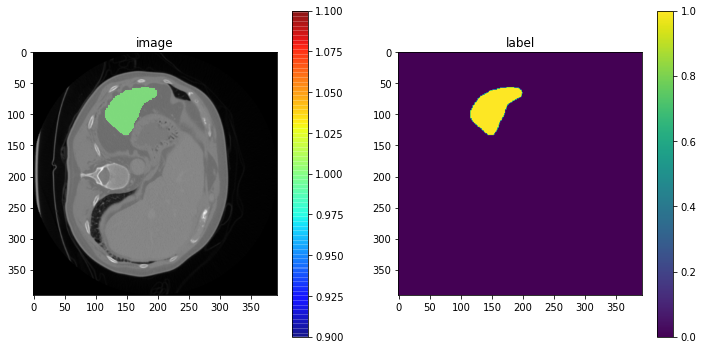

Final PLOT:: 159 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3583.0


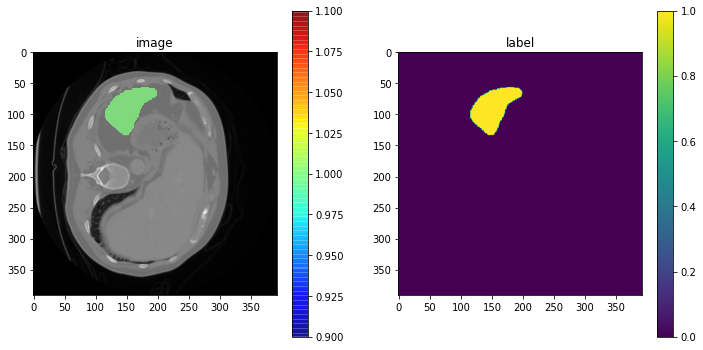

Final PLOT:: 160 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3490.0


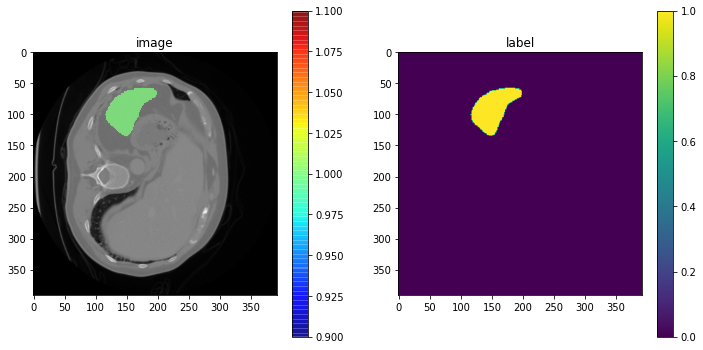

Final PLOT:: 161 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3462.0


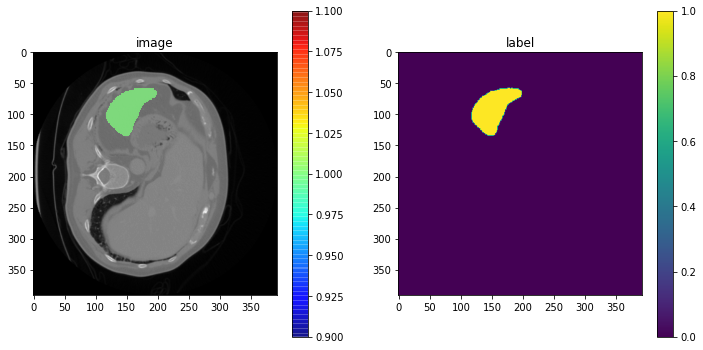

Final PLOT:: 162 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3462.0


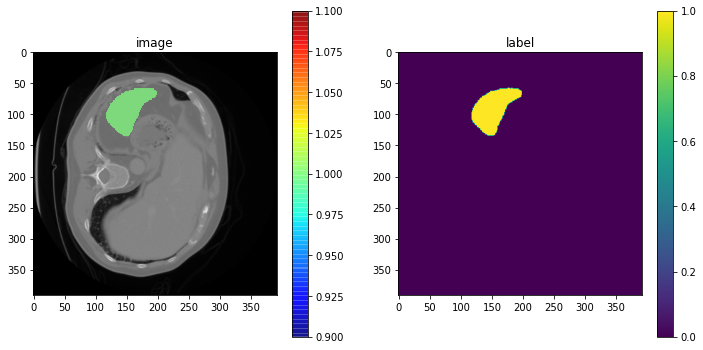

Final PLOT:: 163 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3352.0


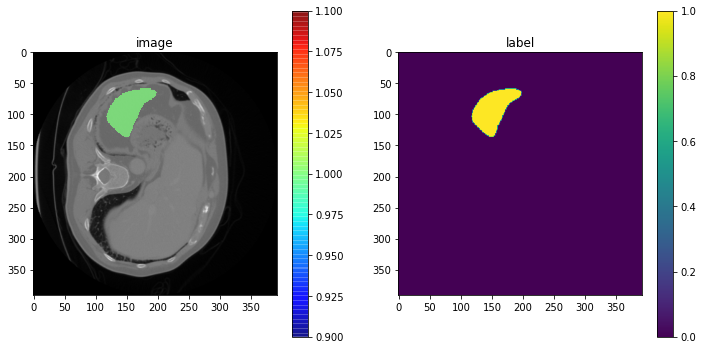

Final PLOT:: 164 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3352.0


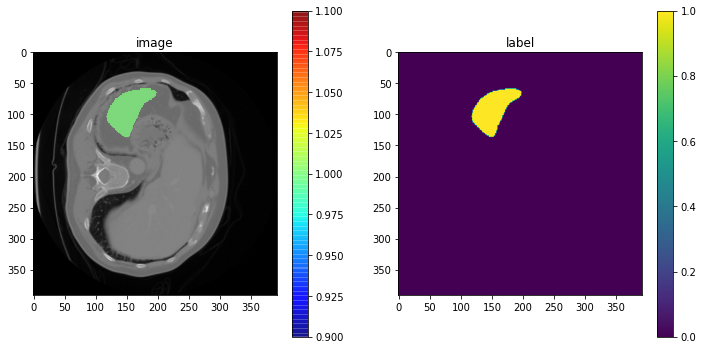

Final PLOT:: 165 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3250.0


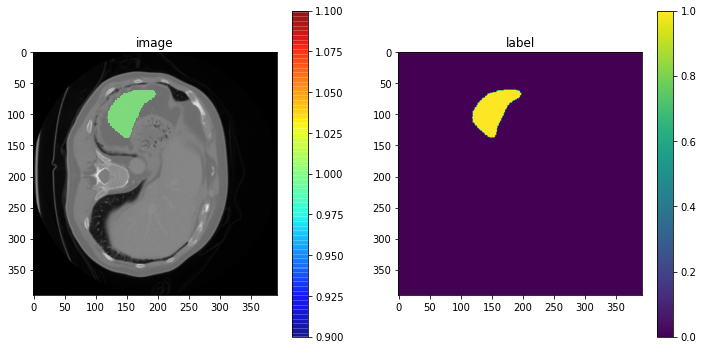

Final PLOT:: 166 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3178.0


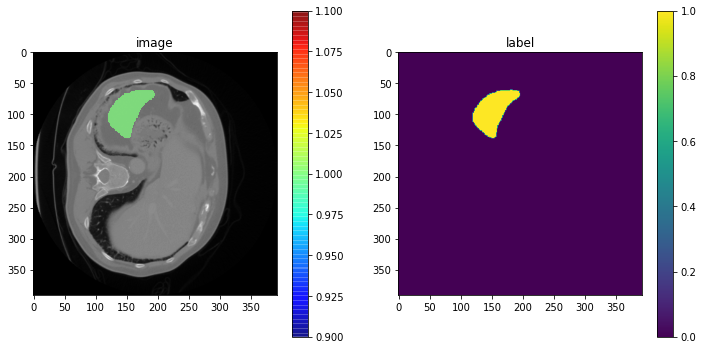

Final PLOT:: 167 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3178.0


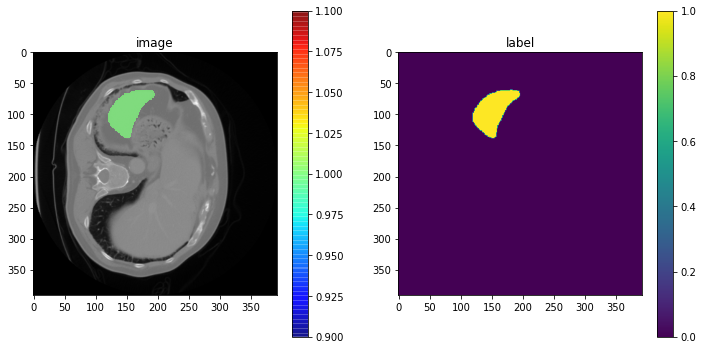

Final PLOT:: 168 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 3058.0


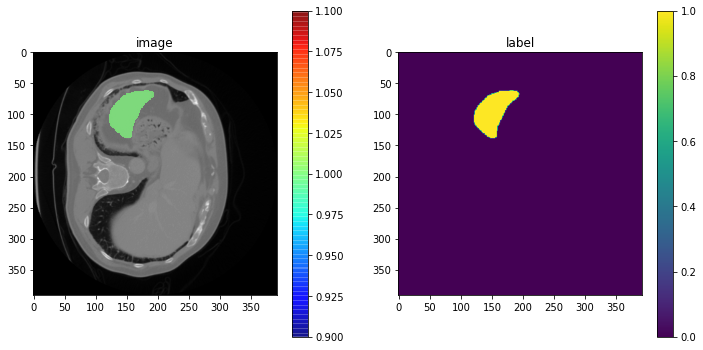

Final PLOT:: 169 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2964.0


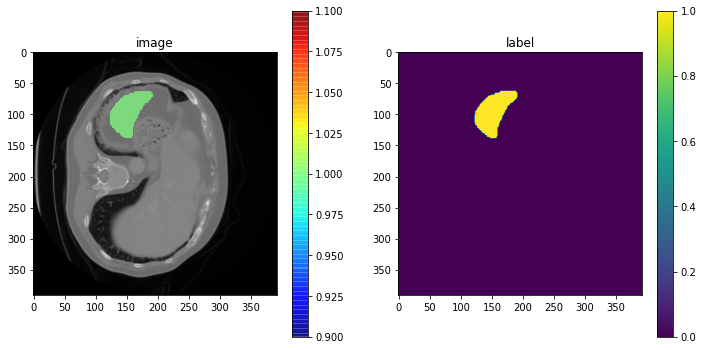

Final PLOT:: 170 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2964.0


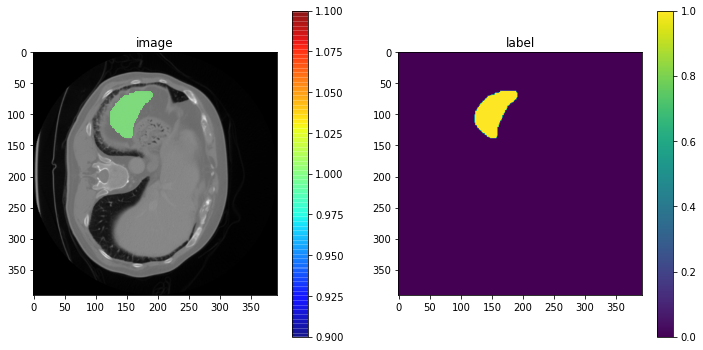

Final PLOT:: 171 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2812.0


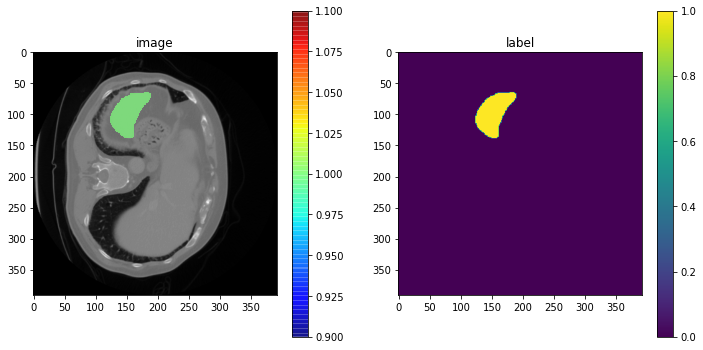

Final PLOT:: 172 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2812.0


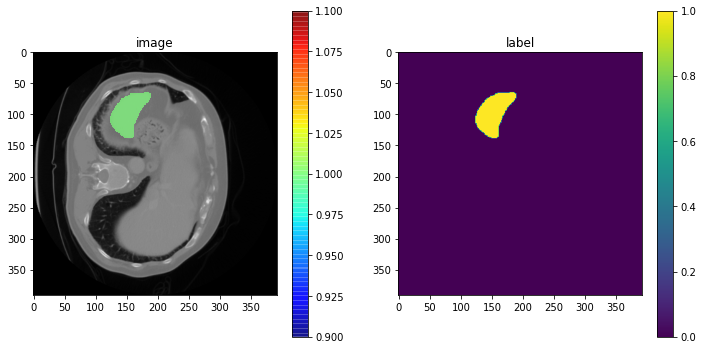

Final PLOT:: 173 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2604.0


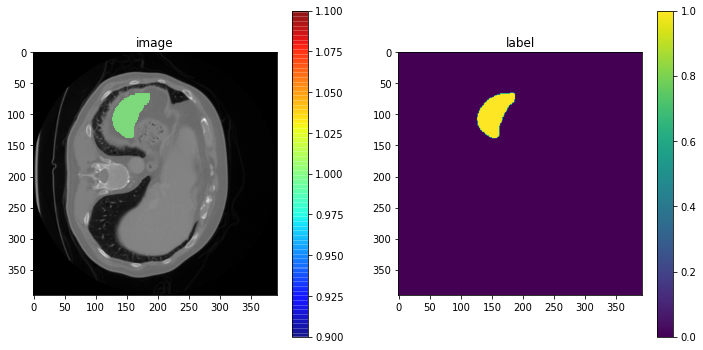

Final PLOT:: 174 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2532.0


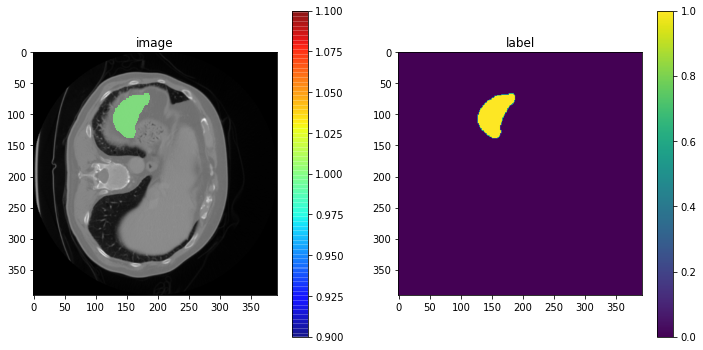

Final PLOT:: 175 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2532.0


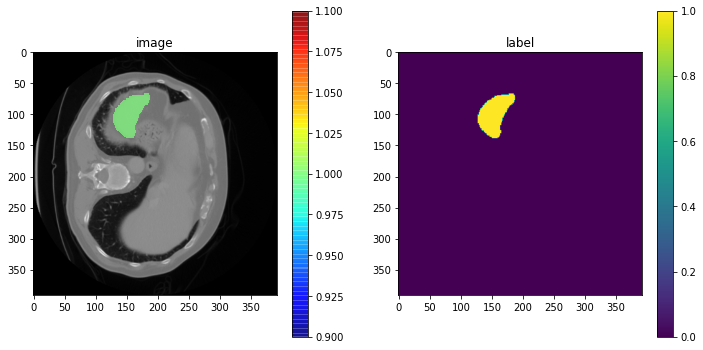

Final PLOT:: 176 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2307.0


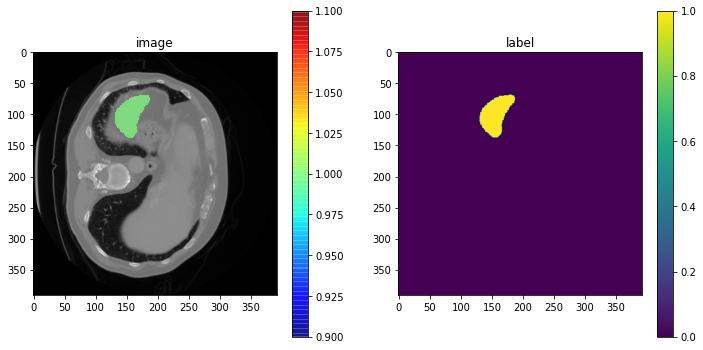

Final PLOT:: 177 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2307.0


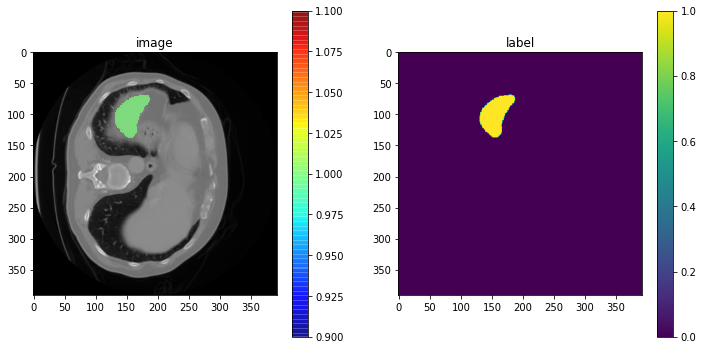

Final PLOT:: 178 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 2098.0


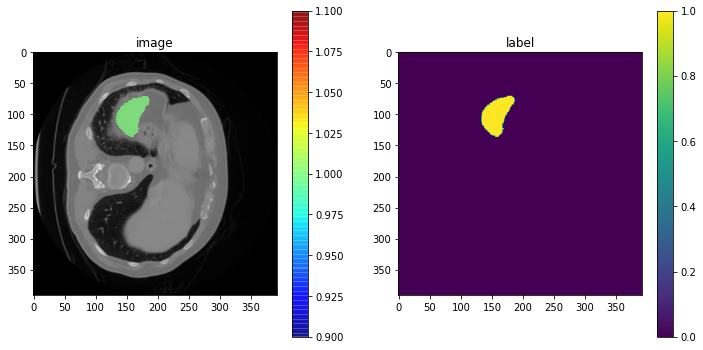

Final PLOT:: 179 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 1930.0


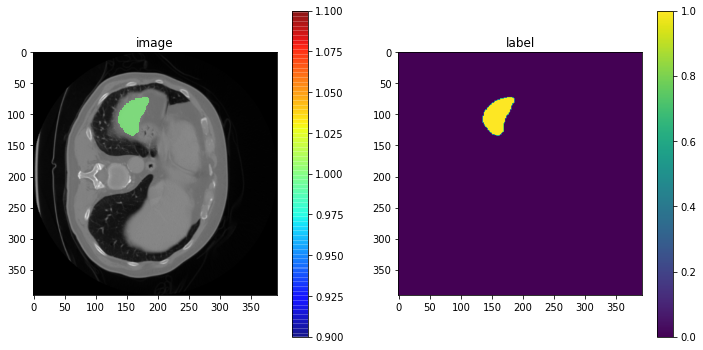

Final PLOT:: 180 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 1930.0


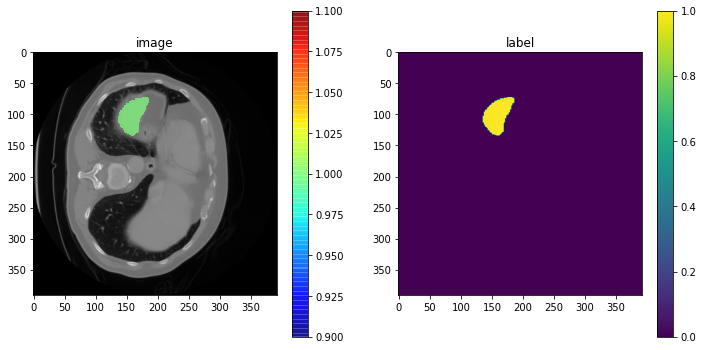

Final PLOT:: 181 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 1741.0


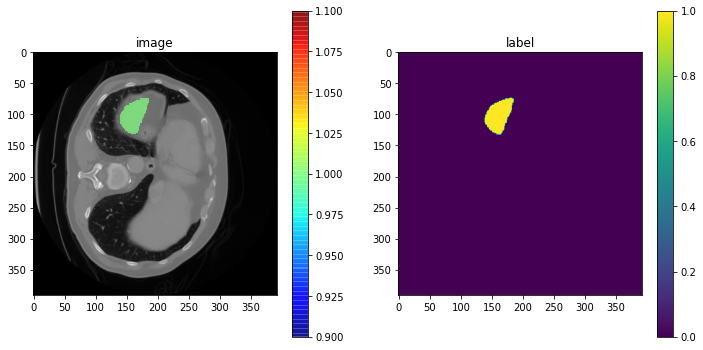

Final PLOT:: 182 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 1741.0


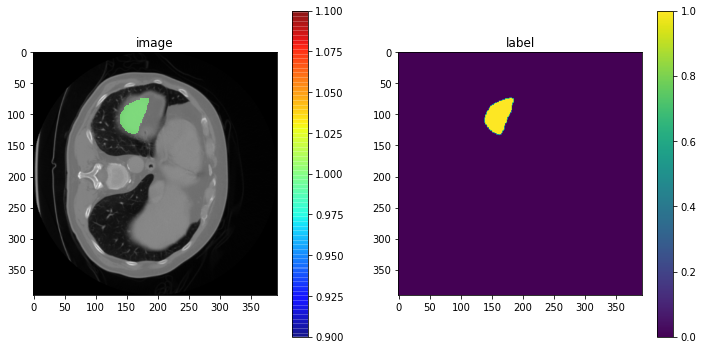

Final PLOT:: 183 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 1362.0


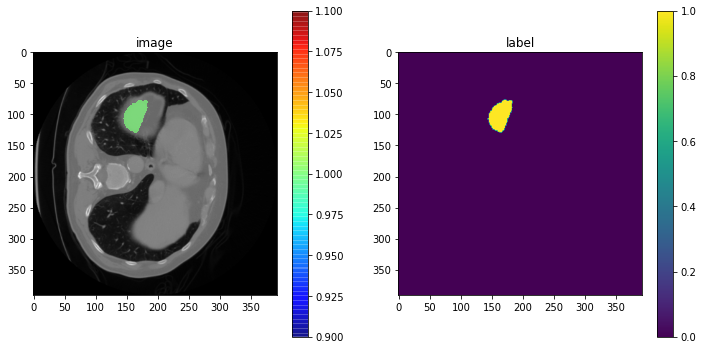

Final PLOT:: 184 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 1186.0


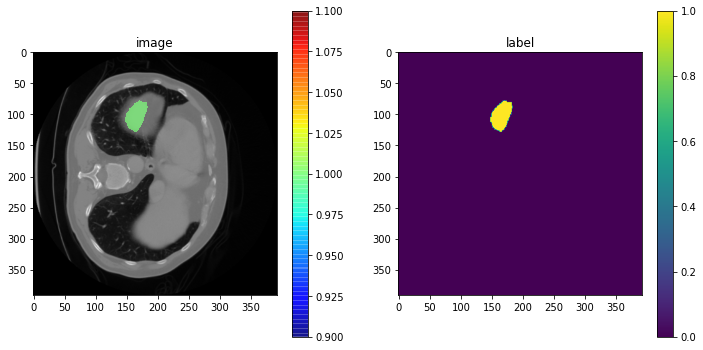

Final PLOT:: 185 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 1186.0


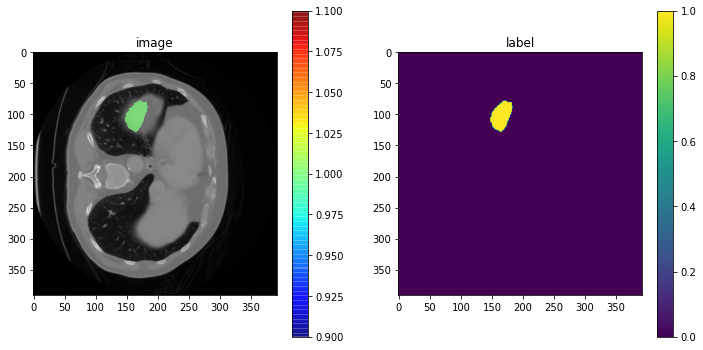

Final PLOT:: 186 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 739.0


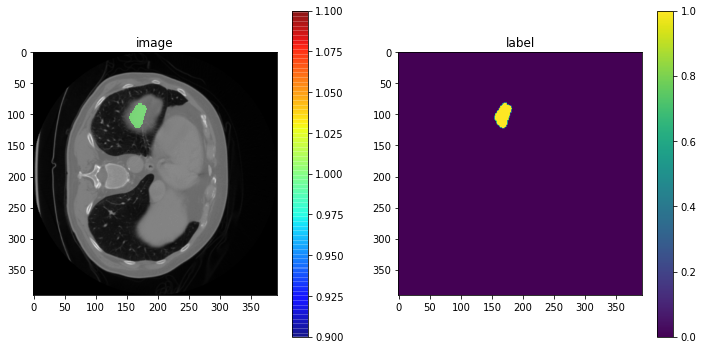

Final PLOT:: 187 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 739.0


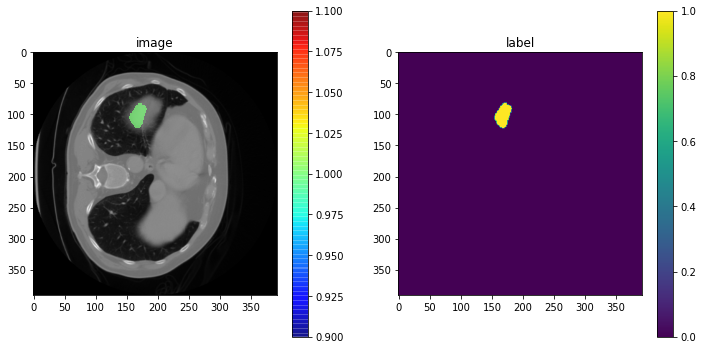

Final PLOT:: 188 => image shape: (392, 392), pred shape: (392, 392); min: 0.0, max: 1.0, sum: 288.0


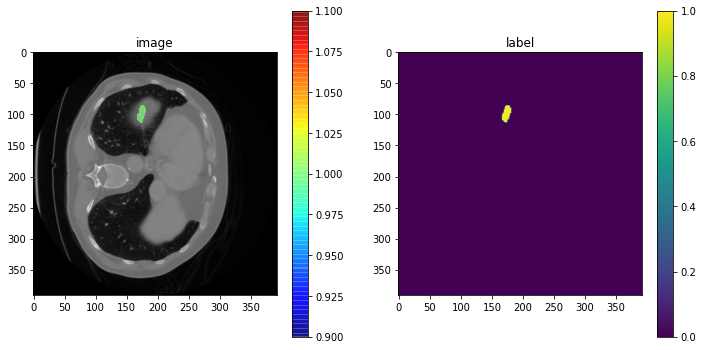

In [4]:
# Evaluation
model_path = 'deepgrow_3d.ts'
model = jit.load(model_path)
model.cuda()
model.eval()

inputs = data['image'][None].cuda()
with torch.no_grad():
    outputs = model(inputs)
outputs = outputs[0]
data['pred'] = outputs

post_transforms = [
    Activationsd(keys='pred', sigmoid=True),
    AsDiscreted(keys='pred', threshold_values=True, logit_thresh=0.5),
    ToNumpyd(keys='pred'),
    RestoreLabeld(keys='pred', ref_image='image', mode='nearest'),
]

pred = None
for t in post_transforms:
    tname = type(t).__name__

    data = t(data)
    image = data['image']
    label = data['pred']
    print("{} => image shape: {}, pred shape: {}; slice_idx: {}".format(tname, image.shape, label.shape, slice_idx))

    if tname in 'RestoreLabeld':
        pred = label

        image = original_image[:, :, original_slice_idx]
        label = label[original_slice_idx]
        print("PLOT:: {} => image shape: {}, pred shape: {}; min: {}, max: {}, sum: {}".format(
            tname, image.shape, label.shape, np.min(label), np.max(label), np.sum(label)))
        show_image(image, label)
    elif tname == 'xToNumpyd':
        for i in range(label.shape[1]):
            img = image[0, i, :, :].detach().cpu().numpy() if torch.is_tensor(image) else image[0][i]
            lab = label[0, i, :, :].detach().cpu().numpy() if torch.is_tensor(label) else label[0][i]
            if np.sum(lab) > 0:
                print("PLOT:: {} => image shape: {}, pred shape: {}; min: {}, max: {}, sum: {}".format(
                    i, img.shape, lab.shape, np.min(lab), np.max(lab), np.sum(lab)))
                show_image(img, lab)
    else:
        image = image[0, slice_idx, :, :].detach().cpu().numpy() if torch.is_tensor(image) else image[0][slice_idx]
        label = label[0, slice_idx, :, :].detach().cpu().numpy() if torch.is_tensor(label) else label[0][slice_idx]
        print("PLOT:: {} => image shape: {}, pred shape: {}; min: {}, max: {}, sum: {}".format(
            tname, image.shape, label.shape, np.min(label), np.max(label), np.sum(label)))
        show_image(image, label)

for i in range(pred.shape[0]):
    image = original_image[:, :, i]
    label = pred[i, :, :]
    if np.sum(label) == 0:
        continue

    print("Final PLOT:: {} => image shape: {}, pred shape: {}; min: {}, max: {}, sum: {}".format(
        i, image.shape, label.shape, np.min(label), np.max(label), np.sum(label)))
    show_image(image, label)

In [5]:
pred = data['pred']
meta_data = data['pred_meta_dict']
affine = meta_data.get("affine", None)

pred = np.moveaxis(pred, 0, -1)
print('Prediction NII shape: {}'.format(pred.shape))

# file_name = 'result_label.nii.gz'
# write_nifti(pred, file_name=file_name)
# print('Prediction saved at: {}'.format(file_name))

Prediction NII shape: (392, 392, 210)


In [6]:
# remove downloaded files
os.remove('_image.nii.gz')
os.remove('deepgrow_3d.ts')